## Scenario
The year is 4043 CE, humanity has brought Earth to the brink of collapse. Our planet, once abundant and vibrant, is now depleted of resources. We can no longer grow food, breathe fresh air, or experience the beauty of nature. Pollution has seeped into every corner, into the soil, the air, and even our blood. Health has become a luxury, as the environment poisons us from the inside out. Crops have withered, and most animal species have vanished. Society is falling apart, with people waging desperate battles over the last remnants of food and water.

Our only hope for survival lies beyond Earth. We must find a new home, a new planet. All eyes turn to SpaceZ, the lone company that might still be able to save humanity. But even SpaceZ has struggled for the past decade, its financial reserves dwindling as the crisis deepened. Despite these setbacks, a bold plan has emerged: Terraforming Mars by creating earth-like atmosphere as the first step. With limited resources at our disposal, the success of this mission depends on one thing, optimizing every step of the atmospheric conversion.

# Terraforming Mars: Greenhouse Gas Maximization Problem

## 1. Problem Description
We aim to terraform Mars by releasing greenhouse gases into its atmosphere. Various industrial processes and terraforming stations can be established on the Martian surface, each contributing different amounts of greenhouse gases and consuming various resources. The goal is to maximize the total greenhouse effect while staying within resource constraints.

Let's formulate this as a linear optimization problem:

## 2. Sets
* $I = \{1, \ldots, 100\}$ : Set of industrial processes and terraforming stations
* $J = \{1, \ldots, 5\}$ : Set of greenhouse gases (e.g., CO₂, CH₄, N₂O, H₂O vapor, CF₄)
* $K = \{1, \ldots, 10\}$ : Set of limited resources (e.g., energy, water, minerals, equipment)

These sets define the scope of our problem. We have 100 different processes or stations, 5 types of greenhouse gases, and 10 different resources to manage.

## 3. Parameters
* $g_{ij}$ : Amount of greenhouse gas $j$ produced by process $i$ (in tons/year)
* $e_j$ : Effectiveness factor of greenhouse gas $j$ (global warming potential)
* $r_{ik}$ : Amount of resource $k$ consumed by process $i$ (in appropriate units/year)
* $R_k$ : Total available amount of resource $k$ per year
* $m_i$ : Minimum operation level for process $i$ (as a fraction of full capacity)
* $M_i$ : Maximum operation level for process $i$ (as a fraction of full capacity)

These parameters describe the characteristics of our processes, gases, and resources. They include production rates, effectiveness of gases, resource consumption, and operational limits.

## 4. Decision Variables
* $x_i$ : Operation level of process $i$ (as a fraction of full capacity)

The decision variables represent what we can control. In this case, how much we operate each process or station. These are the values we'll be solving for.

## 5. Objective Function
Maximize:

$Z = \sum_{i \in I} \sum_{j \in J} g_{ij} \cdot e_j \cdot x_i$

The objective function represents the total greenhouse effect we're trying to maximize. For each process $i$ and gas $j$, we multiply:
* The amount of gas produced for each process/station ($g_{ij}$)
* The effectiveness of that gas ($e_j$)
* The operation level of the process/station ($x_i$)

We then sum this over all processes and gases to get the total effect.

## 6. Constraints

1. Resource constraints:

   $\sum_{i \in I} r_{ik} \cdot x_i \leq R_k \quad \forall k \in K$

   This ensures that for each resource $k$, the total amount used by all processes doesn't exceed the available amount $R_k$.

2. Minimum operation levels:

   $x_i \geq m_i \quad \forall i \in I$

   This sets a lower bound on each process's operation level, ensuring it doesn't fall below its minimum.

3. Maximum operation levels:

   $x_i \leq M_i \quad \forall i \in I$

   This sets an upper bound on each process's operation level, ensuring it doesn't exceed its maximum capacity.

4. Non-negativity:

   $x_i \geq 0 \quad \forall i \in I$

   This ensures that all operation levels are non-negative, as negative operation doesn't make physical sense.

5. Balance constraints (ensure a mix of different gases):

   $\sum_{i \in I} g_{ij} \cdot x_i \geq 0.1 \cdot \sum_{i \in I} \sum_{j \in J} g_{ij} \cdot x_i \quad \forall j \in J$

   This ensures that each type of greenhouse gas represents at least 10% of the total gas production. This prevents the solution from relying too heavily on a single type of gas.

## 7. Problem Summary
This formulation gives us:
* 100 decision variables ($x_i$ for each process)
* 315 constraints:
  - 10 resource constraints
  - 100 minimum operation level constraints
  - 100 maximum operation level constraints
  - 100 non-negativity constraints
  - 5 balance constraints for greenhouse gases

The objective function maximizes the total greenhouse effect by summing the product of gas production, effectiveness, and operation level across all processes and gases. The constraints ensure we stay within resource limits, maintain minimum and maximum operation levels, and keep a balanced mix of different greenhouse gases.

This problem is a continuous linear optimization model as all relationships are linear and the variables can take any real value between their minimum and maximum levels.

## Problem Statement

In [365]:
import pyomo.environ as pyo
import random
import numpy as np
import pandas as pd


# Set random seed for reproducibility
random.seed(43)
np.random.seed(43)

# Create a concrete model
model = pyo.ConcreteModel(name="Mars Terraforming")

# Sets
model.I = pyo.RangeSet(1, 100)  # 100 processes
model.J = pyo.RangeSet(1, 5)    # 5 greenhouse gases
model.K = pyo.RangeSet(1, 10)   # 10 resources

# Parameters
# Greenhouse gas production (tons/year)
model.g = pyo.Param(model.I, model.J, initialize=lambda model, i, j: random.uniform(0, 100))

# Effectiveness factor of greenhouse gases
model.e = pyo.Param(model.J, initialize=lambda model, j: random.uniform(1, 100))

# Resource consumption
model.r = pyo.Param(model.I, model.K, initialize=lambda model, i, k: random.uniform(0, 10))

# Total available resources
model.R = pyo.Param(model.K, initialize=lambda model, k: random.uniform(200, 400))

# Minimum operation levels
model.m = pyo.Param(model.I, initialize=lambda model, i: random.uniform(0.2, 0.4))

# Maximum operation levels
model.M = pyo.Param(model.I, initialize=lambda model, i: random.uniform(0.8, 1))

# Variables
model.x = pyo.Var(model.I, bounds=lambda model, i: (model.m[i], model.M[i]))

# Objective function
def obj_rule(model):
    return sum(model.g[i,j] * model.e[j] * model.x[i] for i in model.I for j in model.J)
model.obj = pyo.Objective(rule=obj_rule, sense=pyo.maximize)

# Constraints
# Resource constraints
def resource_rule(model, k):
    return sum(model.r[i,k] * model.x[i] for i in model.I) <= model.R[k]
model.resource_constraint = pyo.Constraint(model.K, rule=resource_rule)

# Balance constraints
def balance_rule(model, j):
    return sum(model.g[i,j] * model.x[i] for i in model.I) >= 0.1 * sum(model.g[i,jj] * model.x[i] for i in model.I for jj in model.J)
model.balance_constraint = pyo.Constraint(model.J, rule=balance_rule)

# Solve the model
solver = pyo.SolverFactory('glpk')
model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)
results = solver.solve(model, tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmpj4tsqfrs.glpk.raw
 --wglp /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmp9q21ug2l.glpk.glp
 --cpxlp /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmp3jht4o_c.pyomo.lp
Reading problem data from '/var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmp3jht4o_c.pyomo.lp'...
15 rows, 100 columns, 1500 non-zeros
1754 lines were read
Writing problem data to '/var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmp9q21ug2l.glpk.glp'...
1833 lines were written
GLPK Simplex Optimizer 5.0
15 rows, 100 columns, 1500 non-zeros
Preprocessing...
10 rows, 100 columns, 1000 non-zeros
Scaling...
 A: min|aij| =  1.026e-03  max|aij| =  9.990e+00  ratio =  9.734e+03
GM: min|aij| =  3.404e-02  max|aij| =  2.938e+01  ratio =  8.632e+02
EQ: min|aij| =  1.184e-03  max|aij| =  1.000e+00  ratio =  8.445e+02
Constructing initial basis...
Size of triangular part is 10
*     0: ob

The GLPK solver output indicates that the optimal solution has been found. We can see that the solver found an initial feasible solution with an objective value of approximately 456,403.19. After 72 iterations, it reached the optimal solution, improving the objective to 908,342.70, with no remaining infeasibilities. This means that the solver successfully maximized the objective function, subject to the given constraints, and the solution is optimal. The entire process took negligible time and minimal memory, indicating efficient computation.

In [366]:
# After solving the model:
if (results.solver.status == pyo.SolverStatus.ok) and (results.solver.termination_condition == pyo.TerminationCondition.optimal):
    print("Optimal solution found.")
    
    # Print objective value
    print(f"Total greenhouse effect: {pyo.value(model.obj)}")
    
    # Print operation levels for all processes
    print("\nOperation levels for all processes:")
    for i in model.I:
        print(f"Process {i}: {pyo.value(model.x[i]):.2f}")
    
    # Print resource usage
    print("\nResource usage:")
    for k in model.K:
        usage = sum(model.r[i,k] * pyo.value(model.x[i]) for i in model.I)
        print(f"Resource {k}: {usage:.2f} / {model.R[k]:.2f} ({usage/model.R[k]*100:.1f}%)")
else:
    print("Optimal solution not found.")

Optimal solution found.
Total greenhouse effect: 908342.6952261678

Operation levels for all processes:
Process 1: 0.39
Process 2: 0.87
Process 3: 0.85
Process 4: 0.34
Process 5: 0.26
Process 6: 0.22
Process 7: 0.82
Process 8: 0.86
Process 9: 0.89
Process 10: 0.27
Process 11: 0.80
Process 12: 0.30
Process 13: 0.31
Process 14: 0.21
Process 15: 0.25
Process 16: 0.91
Process 17: 0.92
Process 18: 0.92
Process 19: 0.92
Process 20: 0.35
Process 21: 0.38
Process 22: 0.90
Process 23: 0.22
Process 24: 0.27
Process 25: 0.87
Process 26: 0.21
Process 27: 0.84
Process 28: 0.37
Process 29: 0.90
Process 30: 0.81
Process 31: 0.39
Process 32: 0.85
Process 33: 0.29
Process 34: 0.99
Process 35: 0.86
Process 36: 0.86
Process 37: 0.92
Process 38: 0.87
Process 39: 0.23
Process 40: 0.83
Process 41: 0.33
Process 42: 0.28
Process 43: 0.87
Process 44: 0.81
Process 45: 0.39
Process 46: 0.32
Process 47: 0.21
Process 48: 0.25
Process 49: 0.40
Process 50: 0.36
Process 51: 0.37
Process 52: 0.99
Process 53: 0.34
Proc

This report demonstrates that the model has successfully maximized the total greenhouse effect, reaching an optimal value of 908,342.70. The operation levels for the processes vary significantly, with some processes operating close to their maximum capacity (such as processes 16, 17, and 18 at 0.92) and others operating at lower levels (such as processes 47, 68, and 74 around 0.2). This indicates that different processes contribute differently to the objective, likely due to varying resource constraints or greenhouse gas production efficiencies.

We can see that some resources are fully utilized (resources 3, 4, and 9 at 100%), which means that these resources are limiting factors in the optimization. Other resources, while not fully exhausted, are also heavily utilized, with resource usage ranging from 74.9% to 98.9%. This indicates that the model is constrained by available resources, and increasing the capacity of certain fully utilized resources could further enhance the total greenhouse effect. 

In [367]:
print("\nGreenhouse gas production by type:")
for j in model.J:
    gas_j = sum(model.g[i,j] * pyo.value(model.x[i]) for i in model.I)
    total_gas = sum(model.g[i,jj] * pyo.value(model.x[i]) for i in model.I for jj in model.J)
    percentage = (gas_j / total_gas) * 100
    print(f"Gas {j}: {gas_j:.2f} units ({percentage:.1f}% of total)")


Greenhouse gas production by type:
Gas 1: 3066.29 units (21.4% of total)
Gas 2: 2784.29 units (19.4% of total)
Gas 3: 2953.73 units (20.6% of total)
Gas 4: 2804.80 units (19.5% of total)
Gas 5: 2748.18 units (19.1% of total)


The greenhouse gas production results show that the five types of gases contribute relatively evenly to the total greenhouse effect, with each gas contributing around **19-21%**. The highest production comes from **Gas 1**, accounting for **21.4%** of the total, while **Gas 5** contributes the least at **19.1%**. The narrow range of contribution percentages (from 19.1% to 21.4%) suggests that the optimization model has aimed for a balanced production across the different greenhouse gases, influenced by the balance constraints included in the model.

This balanced production ensures that all gases contribute effectively to the overall objective, maximizing the greenhouse effect without overly relying on any single gas. The relatively uniform distribution also suggests that the resources and processes are being allocated in a way that avoids bottlenecks or overproduction of certain gases, thus optimizing the use of available resources across the board.

In [368]:
model.display()

Model Mars Terraforming

  Variables:
    x : Size=100, Index=I
        Key : Lower               : Value             : Upper              : Fixed : Stale : Domain
          1 :  0.3872939308781278 : 0.387293930878128 : 0.9434187357331132 : False : False :  Reals
          2 : 0.32568376218827044 :   0.8745727387714 : 0.8745727387714004 : False : False :  Reals
          3 :  0.3452220160231262 : 0.854647373108038 : 0.8546473731080375 : False : False :  Reals
          4 :  0.3351917366330477 : 0.335191736633048 :  0.942727211048203 : False : False :  Reals
          5 : 0.26266982595855426 : 0.262669825958554 : 0.8121263576955485 : False : False :  Reals
          6 :  0.2163543934448514 : 0.216354393444851 : 0.9374018018011608 : False : False :  Reals
          7 :  0.3153232768788062 : 0.815356422569803 : 0.8153564225698032 : False : False :  Reals
          8 :  0.3217776300738365 :  0.85632275742124 : 0.8563227574212399 : False : False :  Reals
          9 :  0.2806298939891802 : 

1. Variables (Process Operation Levels): The operation levels for the 100 processes show a wide range, with some processes operating close to their minimum (e.g., Process 6 at 0.22) and others near or at their maximum (e.g., Process 34 at 0.99). This variation indicates that certain processes contribute more heavily to the objective (greenhouse gas production), while others are less involved. This suggests the model has prioritized some processes over others based on their efficiency or resource consumption.

2. Objective Function: The model has successfully maximized the total greenhouse gas production to a value of 908,342.70, which reflects the optimal outcome based on the constraints and available resources.

3. Resource Constraints: The model shows the usage of 10 resources, with several being fully utilized or very close to full capacity (e.g., Resource 3, 4, and 9 at 100%). These resources are limiting factors, and increasing their availability could potentially allow further optimization of the greenhouse gas production. Others, like Resource 1 and Resource 5, are utilized at lower levels, around 80-82%, meaning they are not as tightly constrained.

4. Balance Constraints: They are showing how much each gas is exceeding its minimum required production. This aligns perfectly with the percentage outputs we saw:
    1. All gases are producing 19-22% of total
    2. Required minimum was only 10%
    3. Therefore, all gases are significantly exceeding their minimum requirements, which is reflected in these large values

In [369]:
import pyomo.environ as pyo
import numpy as np
import pandas as pd

def analyze_sensitivities(model):
    """
    Analyze and interpret sensitivities (dual values) for the optimization model
    """
    # Create dictionaries to store sensitivities
    resource_sensitivities = {}
    balance_sensitivities = {}
    
    # Get dual values for resource constraints
    print("\nResource Constraint Sensitivities:")
    print("----------------------------------")
    for k in model.K:
        sensitivity = model.dual[model.resource_constraint[k]]
        resource_usage = sum(model.r[i,k] * pyo.value(model.x[i]) for i in model.I)
        capacity = model.R[k]
        utilization = (resource_usage / capacity) * 100
        
        resource_sensitivities[k] = {
            'sensitivity': sensitivity,
            'usage': resource_usage,
            'capacity': capacity,
            'utilization': utilization
        }
        
        print(f"\nResource {k}:")
        print(f"Sensitivity: {sensitivity:.2f}")
        print(f"Usage: {resource_usage:.2f}/{capacity:.2f} ({utilization:.1f}%)")
        print(f"Interpretation: A unit increase in resource {k} would change the objective by {sensitivity:.2f} units")
        
        # Highlight critical resources (high utilization and sensitivity)
        if utilization > 95 and abs(sensitivity) > 1:
            print("*** CRITICAL RESOURCE ***")
            print(f"This resource is heavily utilized and has significant impact on greenhouse gas production")
    
    # Get dual values for balance constraints
    print("\nBalance Constraint Sensitivities:")
    print("--------------------------------")
    for j in model.J:
        sensitivity = model.dual[model.balance_constraint[j]]
        gas_production = sum(model.g[i,j] * pyo.value(model.x[i]) for i in model.I)
        total_production = sum(model.g[i,jj] * pyo.value(model.x[i]) for i in model.I for jj in model.J)
        percentage = (gas_production / total_production) * 100
        
        balance_sensitivities[j] = {
            'sensitivity': sensitivity,
            'production': gas_production,
            'percentage': percentage
        }
        
        print(f"\nGas {j}:")
        print(f"Sensitivity: {sensitivity:.2f}")
        print(f"Production: {gas_production:.2f} ({percentage:.1f}% of total)")
        print(f"Interpretation: A 1% relaxation in minimum requirement would change the objective by {sensitivity:.2f} units")
    
    # Find most critical constraints
    critical_resources = {k: data for k, data in resource_sensitivities.items() 
                        if data['utilization'] > 95 and abs(data['sensitivity']) > 1}
    
    print("\nCritical Analysis Summary:")
    print("-------------------------")
    if critical_resources:
        print("\nMost Critical Resources:")
        for k, data in critical_resources.items():
            print(f"\nResource {k}:")
            print(f"- Utilization: {data['utilization']:.1f}%")
            print(f"- Sensitivity: {data['sensitivity']:.2f}")
            print(f"- Recommendation: Consider increasing capacity of this resource")
    else:
        print("\nNo critically constrained resources found.")
    
    # Recommendations based on sensitivity analysis
    print("\nRecommendations:")
    print("--------------")
    for k, data in sorted(resource_sensitivities.items(), 
                         key=lambda x: abs(x[1]['sensitivity']), reverse=True)[:3]:
        print(f"\nResource {k}:")
        print(f"- Current utilization: {data['utilization']:.1f}%")
        print(f"- Impact per unit: {data['sensitivity']:.2f}")
        if data['utilization'] > 90:
            print("- Action: High priority for capacity increase")
        elif data['utilization'] > 70:
            print("- Action: Monitor usage and plan for potential capacity increase")
        else:
            print("- Action: Maintain current capacity levels")
    
    return resource_sensitivities, balance_sensitivities

# Run the analysis
resource_sens, balance_sens = analyze_sensitivities(model)


Resource Constraint Sensitivities:
----------------------------------

Resource 1:
Sensitivity: 0.00
Usage: 274.11/333.78 (82.1%)
Interpretation: A unit increase in resource 1 would change the objective by 0.00 units

Resource 2:
Sensitivity: 0.00
Usage: 285.47/381.12 (74.9%)
Interpretation: A unit increase in resource 2 would change the objective by 0.00 units

Resource 3:
Sensitivity: 898.89
Usage: 241.63/241.63 (100.0%)
Interpretation: A unit increase in resource 3 would change the objective by 898.89 units
*** CRITICAL RESOURCE ***
This resource is heavily utilized and has significant impact on greenhouse gas production

Resource 4:
Sensitivity: 258.19
Usage: 253.34/253.34 (100.0%)
Interpretation: A unit increase in resource 4 would change the objective by 258.19 units
*** CRITICAL RESOURCE ***
This resource is heavily utilized and has significant impact on greenhouse gas production

Resource 5:
Sensitivity: 0.00
Usage: 265.21/329.16 (80.6%)
Interpretation: A unit increase in reso

Based on our previous findings, we can see that these results make sense. 

1. Resource Constraint Sensitivities:
    1. Resources 3, 4, and 9 are flagged as critical because they are fully utilized (100% usage) and have significant sensitivities. This means that increasing the availability of these resources would have a major positive impact on the objective function (greenhouse gas production):
        - Resource 9 is the most critical, with a sensitivity of 2112.00, meaning that adding one unit of this resource would increase the objective by 2112 units. This is a high-priority resource for capacity expansion.
        - Resource 3 has a sensitivity of 898.89, also indicating it has a large influence on the objective and should be prioritized for a capacity increase.
        - Resource 4 has a sensitivity of 258.19, which is still significant, though less impactful than Resources 3 and 9.
    2. Other resources (e.g., Resources 1, 2, 5, 6, 7, 8, and 10) have zero sensitivity values, meaning that increasing their capacity would have no effect on the objective function. These resources are not limiting factors in the model, so expanding them would not enhance performance:

2. Balance Constraints:
    1. All gas types show 0 sensitivity
    2. All gases are producing well above minimum (19-22% vs 10% required)
    3. This indicates the balance constraints are not limiting factors.
    
    This suggests that the balance between the different gases is not a limiting factor in the optimization; rather, the production levels are balanced sufficiently.Balance constraints are non-binding and the system naturally maintains good gas balance.

The sensitivity analysis clearly identifies Resources 9, 3, and 4 as the most critical for improving the model's performance. Increasing the capacity of these resources would allow for greater greenhouse gas production and further optimization.

These results are logically consistent because:
- Only fully utilized resources (100%) show non-zero sensitivities
- Higher sensitivities correspond to greater potential improvements
- Resources with < 100% utilization have zero sensitivity
- Balance constraints being non-binding aligns with the excess production above minimum requirements



## Dual Problem

### Dual Variables
* $y_k \geq 0$ : Resource dual variables (shadow prices) for resource constraints
* $w_j \geq 0$ : Gas balance dual variables for balance constraints
* $v_i \geq 0$ : Upper bound dual variables for process bounds
* $u_i \geq 0$ : Lower bound dual variables for process bounds

### Dual Objective Function
Minimize:
$Z_D = \sum_{k \in K} R_k \cdot y_k + \sum_{i \in I} (M_i \cdot v_i - m_i \cdot u_i) - 0.1 \sum_{j \in J} (\sum_{i \in I} g_{ij}) \cdot w_j$

### Dual Constraints
For each process $i \in I$:

$\sum_{j \in J} g_{ij} \cdot e_j + \sum_{j \in J} g_{ij} \cdot w_j - 0.1 \cdot \sum_{j \in J} g_{ij} \cdot \sum_{j \in J} w_j = \sum_{k \in K} r_{ik} \cdot y_k + v_i - u_i$

## Strong Duality
At optimality:
$Z = Z_D = 908,342.70$

In [370]:
import pyomo.environ as pyo
import numpy as np
import random

random.seed(43)
np.random.seed(43)

def create_corrected_dual_model():
    # Create a concrete model for the dual problem
    model_dual = pyo.ConcreteModel()

    # Sets
    model_dual.processes = pyo.RangeSet(1, 100)    # 100 processes
    model_dual.gases = pyo.RangeSet(1, 5)         # 5 greenhouse gases
    model_dual.resources = pyo.RangeSet(1, 10)    # 10 resources

    # Parameters (same as before)
    model_dual.gas_production = pyo.Param(
        model_dual.processes, 
        model_dual.gases, 
        initialize=lambda model, i, j: random.uniform(0, 100)
    )
    
    model_dual.gas_effectiveness = pyo.Param(
        model_dual.gases, 
        initialize=lambda model, j: random.uniform(1, 100)
    )
    
    model_dual.resource_usage = pyo.Param(
        model_dual.processes, 
        model_dual.resources, 
        initialize=lambda model, i, k: random.uniform(0, 10)
    )
    
    model_dual.resource_capacity = pyo.Param(
        model_dual.resources, 
        initialize=lambda model, k: random.uniform(200, 400)
    )
    
    model_dual.min_operation = pyo.Param(
        model_dual.processes, 
        initialize=lambda model, i: random.uniform(0.2, 0.4)
    )
    
    model_dual.max_operation = pyo.Param(
        model_dual.processes, 
        initialize=lambda model, i: random.uniform(0.8, 1)
    )

    # Dual Variables
    model_dual.resource_dual = pyo.Var(model_dual.resources, domain=pyo.NonNegativeReals)
    model_dual.gas_balance_dual = pyo.Var(model_dual.gases, domain=pyo.NonNegativeReals)
    model_dual.process_upper_dual = pyo.Var(model_dual.processes, domain=pyo.NonNegativeReals)
    model_dual.process_lower_dual = pyo.Var(model_dual.processes, domain=pyo.NonNegativeReals)

    # Corrected Objective Function
    def dual_objective(model):
        # Resource capacity terms
        resource_terms = sum(
            model.resource_capacity[k] * model.resource_dual[k] 
            for k in model.resources
        )
        
        # Gas balance terms - corrected the nested sum structure
        balance_terms = -0.1 * sum(
            sum(model.gas_production[i,j] for i in model.processes) * model.gas_balance_dual[j]
            for j in model.gases
        )
        
        # Process bound terms
        bound_terms = sum(
            model.max_operation[i] * model.process_upper_dual[i] - 
            model.min_operation[i] * model.process_lower_dual[i]
            for i in model.processes
        )
        
        return resource_terms + balance_terms + bound_terms

    model_dual.dual_objective = pyo.Objective(rule=dual_objective, sense=pyo.minimize)

    # Dual Constraints
    def dual_constraint_rule(model, process):
        # Resource usage terms
        resource_terms = sum(
            model.resource_usage[process,k] * model.resource_dual[k] 
            for k in model.resources
        )
        
        # Gas production and effectiveness terms
        gas_terms = sum(
            model.gas_production[process,j] * model.gas_effectiveness[j] + 
            model.gas_production[process,j] * model.gas_balance_dual[j] -
            0.1 * model.gas_production[process,j] * sum(model.gas_balance_dual[g] for g in model.gases)
            for j in model.gases
        )
        
        # Bound terms
        bound_terms = model.process_upper_dual[process] - model.process_lower_dual[process]
        
        return gas_terms - resource_terms - bound_terms == 0

    model_dual.dual_constraints = pyo.Constraint(model_dual.processes, rule=dual_constraint_rule)

    return model_dual

def solve_corrected_dual_problem():
    model_dual = create_corrected_dual_model()
    solver = pyo.SolverFactory('glpk')
    results = solver.solve(model_dual, tee=True)
    
    if ((results.solver.status == pyo.SolverStatus.ok) and 
        (results.solver.termination_condition == pyo.TerminationCondition.optimal)):
        print("\nOptimal solution found.")
        print(f"Objective Value: {pyo.value(model_dual.dual_objective)}")
        
        print("\nResource Shadow Prices:")
        for k in model_dual.resources:
            if abs(pyo.value(model_dual.resource_dual[k])) > 1e-6:
                print(f"Resource {k}: {pyo.value(model_dual.resource_dual[k]):.4f}")
        
        print("\nGas Balance Multipliers:")
        for j in model_dual.gases:
            if abs(pyo.value(model_dual.gas_balance_dual[j])) > 1e-6:
                print(f"Gas {j}: {pyo.value(model_dual.gas_balance_dual[j]):.4f}")
        
        print("\nProcess Bound Multipliers:")
        for i in model_dual.processes:
            upper = pyo.value(model_dual.process_upper_dual[i])
            lower = pyo.value(model_dual.process_lower_dual[i])
            if abs(upper) > 1e-6 or abs(lower) > 1e-6:
                print(f"Process {i}: Upper={upper:.4f}, Lower={lower:.4f}")
    else:
        print("Failed to find optimal solution.")

if __name__ == "__main__":
    solve_corrected_dual_problem()

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmpui87bc3k.glpk.raw
 --wglp /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmp4unrpv2t.glpk.glp
 --cpxlp /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmpju00ycl7.pyomo.lp
Reading problem data from '/var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmpju00ycl7.pyomo.lp'...
100 rows, 215 columns, 1700 non-zeros
2439 lines were read
Writing problem data to '/var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmp4unrpv2t.glpk.glp'...
2333 lines were written
GLPK Simplex Optimizer 5.0
100 rows, 215 columns, 1700 non-zeros
Preprocessing...
100 rows, 115 columns, 1600 non-zeros
Scaling...
 A: min|aij| =  1.026e-03  max|aij| =  7.962e+01  ratio =  7.758e+04
GM: min|aij| =  3.358e-02  max|aij| =  2.978e+01  ratio =  8.868e+02
EQ: min|aij| =  1.139e-03  max|aij| =  1.000e+00  ratio =  8.783e+02
Constructing initial basis...
Size of triangular part is 100
*     0

We got the perfect match! and we have strong duality. This is because:

1. Objective Values Match:
    * Primal: 908,342.70
    * Dual: 908,342.70 (exact match!)

2. Resource Shadow Prices perfectly match our primal solution's binding resources:
    * Resource 3: 898.8912
    * Resource 4: 258.1855
    * Resource 9: 2111.9969

    This exactly matches what we saw in the primal sensitivity analysis. These were the three critical resources that were fully utilized (100%).

3. Gas Balance Multipliers:
    * All zeros, which is correct because in our primal solution, all gases were producing well above their minimum requirements (19-21% vs required 10%), so these constraints were not binding.

4. Process Bound Multipliers show which processes are at their bounds:
    * Many processes have non-zero upper or lower bound multipliers, indicating they're operating at their bounds
    This makes sense given our primal solution showed many processes operating at either their minimum or maximum levels



## Mathematical Formulation of MILP Model

We introduce a new mixed-integer model by defining new binary variables $y_i$ to represent process activation status for different processes. Now each process can be active (1) or inactive (0). This makes the operation level of a precess $x_i$ be 0 it it is inactive. We have also added an economic constraint for inactive processes. Each process now has a startup cost going from inactive to active. And the total amount of process startup costs need to stay within budget.  In addition, now we have different groups of process to impose some logical conditions as well. These are Chemical, Biological, Physical, and Atomospheric. Now for each group, we can impose adjusted characteristics. For example, higher startup costs for Chemical processes and Higher energy consumption for Physical Processes. 

## 1. Sets

- $I = \{1,\ldots,100\}$ : Set of processes
- $J = \{1,\ldots,5\}$ : Set of greenhouse gases
- $K = \{1,\ldots,10\}$ : Set of resources
- $G = \{\text{CHEMICAL}, \text{BIOLOGICAL}, \text{PHYSICAL}, \text{ATMOSPHERIC}\}$ : Set of process groups
- $I_g \subseteq I$ : Set of processes belonging to group $g \in G$

## 2. Parameters

### Efficiency and Production Parameters
- $g_{ij}$ : Amount of greenhouse gas $j$ produced by process $i$ (tons/year)
- $e_j$ : Effectiveness factor of greenhouse gas $j$ (global warming potential)
- $r_{ik}$ : Amount of resource $k$ consumed by process $i$ (units/year)
- $R_k$ : Total available amount of resource $k$ per year

### Operational Parameters
- $m_i$ : Minimum operation level for process $i$ (as fraction of capacity)
- $M_i$ : Maximum operation level for process $i$ (as fraction of capacity)
- $c_i$ : Startup cost for process $i$
- $B$ : Total available budget for startup costs

### Group-Related Parameters
- $\text{min}_g$ : Minimum number of active processes required in group $g$
- $\text{max}_g$ : Maximum number of active processes allowed in group $g$

## 3. Decision Variables

### Continuous Variables
- $x_i \geq 0$ : Operation level of process $i$ (as fraction of capacity)

### Binary Variables
- $y_i \in \{0,1\}$ : Activation status of process $i$ (1 if active, 0 if inactive)

## 4. Objective Function

Maximize total greenhouse effect minus startup costs:

$\text{Maximize } Z = \sum_{i \in I} \sum_{j \in J} g_{ij} e_j x_i - \sum_{i \in I} c_i y_i$

## 5. Constraints

### Resource Constraints
For each resource $k \in K$:
$\sum_{i \in I} r_{ik} x_i \leq R_k$

### Gas Balance Constraints
For each gas $j \in J$:
$\sum_{i \in I} g_{ij} x_i \geq 0.1 \sum_{i \in I} \sum_{j \in J} g_{ij} x_i$

### Operation Level Constraints
For each process $i \in I$:
$x_i \leq M_i y_i$

For each process $i \in I$:
$x_i \geq m_i y_i$

### Budget Constraint
$\sum_{i \in I} c_i y_i \leq B$

### Group Size Constraints
For each group $g \in G$:
$\text{min}_g \leq \sum_{i \in I_g} y_i \leq \text{max}_g$

### Non-negativity and Binary Constraints
$x_i \geq 0 \quad \forall i \in I$
$y_i \in \{0,1\} \quad \forall i \in I$

## 6. Group-Specific Parameter Values

### Maximum Active Processes per Group
- $\text{max}_{\text{CHEMICAL}} = 12$
- $\text{max}_{\text{BIOLOGICAL}} = 15$
- $\text{max}_{\text{PHYSICAL}} = 10$
- $\text{max}_{\text{ATMOSPHERIC}} = 20$

### Minimum Active Processes per Group
- $\text{min}_{\text{CHEMICAL}} = 5$
- $\text{min}_{\text{BIOLOGICAL}} = 8$
- $\text{min}_{\text{PHYSICAL}} = 4$
- $\text{min}_{\text{ATMOSPHERIC}} = 6$

## 7. Group-Specific Gas Production

To provide controlled randomness with bounds and model real-world uncertainty, we used bounded uniform distributions to populate processes based on their group.

### Chemical Processes
For $i \in I_{\text{CHEMICAL}}$:
- $g_{ij} \sim U(70,100)$ for $j \in \{1,5\}$ : (CO₂ and CF₄ -> specialized chemical reactions) highly effective for these gases
- $g_{ij} \sim U(0,30)$ for $j \in \{2,3,4\}$ : limited production capability or technological limitations, chemical processes aren't good at biological gases

### Biological Processes
For $i \in I_{\text{BIOLOGICAL}}$:
- $g_{ij} \sim U(70,100)$ for $j \in \{2,3\}$ (CH₄ and N₂O) -> natural biological processes
- $g_{ij} \sim U(0,30)$ for $j \in \{1,4,5\}$ organisms specialized for certain gases

### Physical Processes
For $i \in I_{\text{PHYSICAL}}$:
- $g_{ij} \sim U(70,100)$ for $j = 4$ (H₂O vapor), direct phase change
- $g_{ij} \sim U(0,30)$ for $j \in \{1,2,3,5\}$, physical processes limited to water

### Atmospheric Processes
For $i \in I_{\text{ATMOSPHERIC}}$:
- $g_{ij} \sim U(40,60)$ for all $j \in J$ : Balanced production, a Jack-of-all-trades approach

## 8. Model Characteristics

- Number of continuous variables: 100 ($x_i$)
- Number of binary variables: 100 ($y_i$)
- Total number of variables: 200
- Number of constraints: ≈ 224 (as shown in solver output)
  * 10 resource constraints
  * 5 gas balance constraints
  * 100 logical linking constraints
  * 100 minimum operation constraints
  * 1 budget constraint
  * 8 group size constraints (min and max for each group)

Here, $U(a,b)$ represents a uniform random distribution between $a$ and $b$.

In [382]:
import pyomo.environ as pyo
import random
import numpy as np

# Set random seed for reproducibility
random.seed(43)
np.random.seed(43)

def create_mars_milp_model():
    model = pyo.ConcreteModel(name="Mars Terraforming MILP")

    # Sets
    model.I = pyo.RangeSet(1, 100)  # 100 processes
    model.J = pyo.RangeSet(1, 5)    # 5 greenhouse gases
    model.K = pyo.RangeSet(1, 10)   # 10 resources
    model.GROUPS = pyo.Set(initialize=['CHEMICAL', 'BIOLOGICAL', 'PHYSICAL', 'ATMOSPHERIC'])

    # First, create the process group assignments
    process_groups = []
    group_names = list(model.GROUPS.data())
    processes_per_group = 25  # 100 processes / 4 groups
    for group in group_names:
        process_groups.extend([group] * processes_per_group)
    random.shuffle(process_groups)
    
    # Create the process_group parameter
    model.process_group = pyo.Param(model.I, 
                                  initialize=lambda m, i: process_groups[i-1],
                                  within=model.GROUPS)

    # Now we can define parameters that depend on process groups
    def init_group_efficiency(m, i, j):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(70, 100) if j in [1, 5] else random.uniform(0, 30)
        elif group == 'BIOLOGICAL':
            return random.uniform(70, 100) if j in [2, 3] else random.uniform(0, 30)
        elif group == 'PHYSICAL':
            return random.uniform(70, 100) if j == 4 else random.uniform(0, 30)
        else:  # ATMOSPHERIC
            return random.uniform(40, 60)

    model.g = pyo.Param(model.I, model.J, initialize=init_group_efficiency)

    def init_startup_cost(m, i):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(150, 200)
        elif group == 'BIOLOGICAL':
            return random.uniform(100, 150)
        elif group == 'PHYSICAL':
            return random.uniform(120, 170)
        else:  # ATMOSPHERIC
            return random.uniform(80, 130)

    model.startup_cost = pyo.Param(model.I, initialize=init_startup_cost)

    def init_resource_usage(m, i, k):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(6, 10) if k in [1, 2] else random.uniform(0, 4)
        elif group == 'BIOLOGICAL':
            return random.uniform(6, 10) if k in [3, 4] else random.uniform(0, 4)
        elif group == 'PHYSICAL':
            return random.uniform(6, 10) if k in [5, 6] else random.uniform(0, 4)
        else:  # ATMOSPHERIC
            return random.uniform(3, 7)

    model.r = pyo.Param(model.I, model.K, initialize=init_resource_usage)

    # Other parameters
    model.e = pyo.Param(model.J, initialize=lambda m, j: random.uniform(1, 100))
    model.R = pyo.Param(model.K, initialize=lambda m, k: random.uniform(200, 400))
    model.m = pyo.Param(model.I, initialize=lambda m, i: random.uniform(0.2, 0.4))
    model.M = pyo.Param(model.I, initialize=lambda m, i: random.uniform(0.8, 1))

    # Group operational limits
    model.max_active_per_group = pyo.Param(model.GROUPS, initialize={
        'CHEMICAL': 12,
        'BIOLOGICAL': 15,
        'PHYSICAL': 10,
        'ATMOSPHERIC': 20
    })

    model.min_active_per_group = pyo.Param(model.GROUPS, initialize={
        'CHEMICAL': 5,
        'BIOLOGICAL': 8,
        'PHYSICAL': 4,
        'ATMOSPHERIC': 6
    })

    model.startup_budget = pyo.Param(initialize=5000)

    # Variables
    model.x = pyo.Var(model.I, bounds=lambda m, i: (0, m.M[i]))
    model.y = pyo.Var(model.I, domain=pyo.Binary)

    # Objective function
    def obj_rule(model):
        greenhouse_effect = sum(model.g[i,j] * model.e[j] * model.x[i] 
                              for i in model.I for j in model.J)
        startup_costs = sum(model.startup_cost[i] * model.y[i] for i in model.I)
        return greenhouse_effect - startup_costs

    model.obj = pyo.Objective(rule=obj_rule, sense=pyo.maximize)

    # Constraints
    def resource_rule(model, k):
        return sum(model.r[i,k] * model.x[i] for i in model.I) <= model.R[k]
    model.resource_constraint = pyo.Constraint(model.K, rule=resource_rule)

    def balance_rule(model, j):
        return (sum(model.g[i,j] * model.x[i] for i in model.I) >= 
                0.1 * sum(model.g[i,jj] * model.x[i] for i in model.I for jj in model.J))
    model.balance_constraint = pyo.Constraint(model.J, rule=balance_rule)

    def logical_link_rule(model, i):
        return model.x[i] <= model.M[i] * model.y[i]
    model.logical_link = pyo.Constraint(model.I, rule=logical_link_rule)

    def min_operation_rule(model, i):
        return model.x[i] >= model.m[i] * model.y[i]
    model.min_operation = pyo.Constraint(model.I, rule=min_operation_rule)

    def budget_rule(model):
        return sum(model.startup_cost[i] * model.y[i] for i in model.I) <= model.startup_budget
    model.budget_constraint = pyo.Constraint(rule=budget_rule)

    def max_group_rule(model, group):
        return (sum(model.y[i] for i in model.I 
                if model.process_group[i] == group) <= model.max_active_per_group[group])
    model.max_group_constraint = pyo.Constraint(model.GROUPS, rule=max_group_rule)

    def min_group_rule(model, group):
        return (sum(model.y[i] for i in model.I 
                if model.process_group[i] == group) >= model.min_active_per_group[group])
    model.min_group_constraint = pyo.Constraint(model.GROUPS, rule=min_group_rule)

    return model

if __name__ == "__main__":
    model = create_mars_milp_model()
    solver = pyo.SolverFactory('glpk')
    results = solver.solve(model, tee=True)

    if (results.solver.status == pyo.SolverStatus.ok and 
        results.solver.termination_condition == pyo.TerminationCondition.optimal):
        
        print("\nProcess Group Analysis:")
        for group in model.GROUPS:
            active = sum(1 for i in model.I 
                       if model.process_group[i] == group and pyo.value(model.y[i]) > 0.5)
            total_cost = sum(model.startup_cost[i] * pyo.value(model.y[i]) 
                           for i in model.I if model.process_group[i] == group)
            
            print(f"\n{group} Processes:")
            print(f"Active processes: {active}")
            print(f"Min required: {model.min_active_per_group[group]}")
            print(f"Max allowed: {model.max_active_per_group[group]}")
            print(f"Total startup cost: {total_cost:.2f}")
            
            # Calculate average production by gas type
            for j in model.J:
                prod = sum(model.g[i,j] * pyo.value(model.x[i]) 
                         for i in model.I if model.process_group[i] == group)
                print(f"Gas {j} production: {prod:.2f}")

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmp91zll7ok.glpk.raw
 --wglp /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmprov0amm2.glpk.glp
 --cpxlp /var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmpgf1iat1m.pyomo.lp
Reading problem data from '/var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmpgf1iat1m.pyomo.lp'...
/var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmpgf1iat1m.pyomo.lp:3282: warning: lower bound of variable 'x102' redefined
/var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmpgf1iat1m.pyomo.lp:3282: warning: upper bound of variable 'x102' redefined
224 rows, 200 columns, 2200 non-zeros
100 integer variables, all of which are binary
3382 lines were read
Writing problem data to '/var/folders/4k/wn_kz0ds0wdflf2rv9ky934c0000gn/T/tmprov0amm2.glpk.glp'...
3151 lines were written
GLPK Integer Optimizer 5.0
224 rows, 200 columns, 2200 non-zeros
100 integer variables, all of which are bi

As we can see, the solver found an optimal integer solution, with the final objective value of 477,805.
For Chemical processes, we have:
Active: 9 (between min 5 and max 12)
Cost: 1528.40 (highest per-process cost)
Gas Production:
- Gas 1 (CO2): 747.33 (very high)
- Gas 5 (CF4): 709.84 (very high)
- Others: much lower (as designed)

This shows the chemical processes are working as intended, excelling at CO2 and CF4 production while minimizing other gases.
For Biological, we have:
Active: 9 (between min 8 and max 15)
Cost: 1023.89 (moderate)
Gas Production:
- Gas 2 (CH4): 730.53 (very high)
- Gas 3 (N2O): 719.21 (very high)
- Others: much lower

Perfect specialization in methane and N2O production, exactly as designed.
Regarding Physical processes:
Active: 4 (at minimum required)
Cost: 502.90 (lowest total cost)
Gas Production:
- Gas 4 (H2O vapor): 344.88 (high)
- Others: very low

Operating at minimum capacity but still effectively producing water vapor.

and for Atmospheric processes:
Active: 20 (at maximum allowed)
Cost: 1944.16 (highest total cost due to many processes)
Gas Production: All around 850-937 (very balanced)

Running at full capacity with balanced production across all gases.

For other aspects, we have:

1. Budget Optimization:
    * Total spent: 4,999.35 (out of 5,000 budget)
    * Very efficient use of budget (99.99% utilized)

2. Process Distribution:
    * Total active processes: 42
    * Most efficient use of minimums and maximums
    * Atmospheric processes maximized due to their efficiency/cost ratio

3. Gas Production Strategy:
    * Each specialized group is producing its target gases effectively
    * Atmospheric processes provide a strong baseline production
    * Good balance between specialized and general production


4. Strategic Implications:
    The model has found an optimal balance between:
    * Specialization (chemical, biological, physical processes)
    * Redundancy (atmospheric processes)
    * Cost efficiency
    * Gas production targets

5. Operational Success:
    * All minimum requirements met
    * Maximum constraints respected
    * Budget fully utilized
    * Each group performing its specialized role




In [383]:
import pyomo.environ as pyo
import random
import numpy as np

# Set random seed for reproducibility
random.seed(43)
np.random.seed(43)

def generate_fixed_parameters():
    """Generate all random parameters once and store them"""
    params = {}
    
    # Generate process groups
    groups = ['CHEMICAL', 'BIOLOGICAL', 'PHYSICAL', 'ATMOSPHERIC']
    process_groups = []
    for group in groups:
        process_groups.extend([group] * 25)
    random.shuffle(process_groups)
    params['process_groups'] = process_groups
    
    # Generate gas production efficiencies
    g_params = {}
    for i in range(1, 101):
        for j in range(1, 6):
            group = process_groups[i-1]
            if group == 'CHEMICAL':
                value = random.uniform(70, 100) if j in [1, 5] else random.uniform(0, 30)
            elif group == 'BIOLOGICAL':
                value = random.uniform(70, 100) if j in [2, 3] else random.uniform(0, 30)
            elif group == 'PHYSICAL':
                value = random.uniform(70, 100) if j == 4 else random.uniform(0, 30)
            else:  # ATMOSPHERIC
                value = random.uniform(40, 60)
            g_params[(i,j)] = value
    params['g'] = g_params
    
    # Generate startup costs
    startup_costs = {}
    for i in range(1, 101):
        group = process_groups[i-1]
        if group == 'CHEMICAL':
            cost = random.uniform(150, 200)
        elif group == 'BIOLOGICAL':
            cost = random.uniform(100, 150)
        elif group == 'PHYSICAL':
            cost = random.uniform(120, 170)
        else:  # ATMOSPHERIC
            cost = random.uniform(80, 130)
        startup_costs[i] = cost
    params['startup_cost'] = startup_costs
    
    # Generate resource usage
    r_params = {}
    for i in range(1, 101):
        for k in range(1, 11):
            group = process_groups[i-1]
            if group == 'CHEMICAL':
                value = random.uniform(6, 10) if k in [1, 2] else random.uniform(0, 4)
            elif group == 'BIOLOGICAL':
                value = random.uniform(6, 10) if k in [3, 4] else random.uniform(0, 4)
            elif group == 'PHYSICAL':
                value = random.uniform(6, 10) if k in [5, 6] else random.uniform(0, 4)
            else:  # ATMOSPHERIC
                value = random.uniform(3, 7)
            r_params[(i,k)] = value
    params['r'] = r_params
    
    # Generate other parameters
    params['e'] = {j: random.uniform(1, 100) for j in range(1, 6)}
    params['R'] = {k: random.uniform(200, 400) for k in range(1, 11)}
    params['m'] = {i: random.uniform(0.2, 0.4) for i in range(1, 101)}
    params['M'] = {i: random.uniform(0.8, 1) for i in range(1, 101)}
    
    return params

def create_mars_model(params, binary=True):
    """Creates the Mars terraforming model with fixed parameters"""
    model = pyo.ConcreteModel(name="Mars Terraforming Model")

    # Sets
    model.I = pyo.RangeSet(1, 100)
    model.J = pyo.RangeSet(1, 5)
    model.K = pyo.RangeSet(1, 10)
    model.GROUPS = pyo.Set(initialize=['CHEMICAL', 'BIOLOGICAL', 'PHYSICAL', 'ATMOSPHERIC'])

    # Process group parameter
    model.process_group = pyo.Param(model.I, 
                                  initialize=lambda m, i: params['process_groups'][i-1],
                                  within=model.GROUPS)

    # Parameters using pre-generated values
    model.g = pyo.Param(model.I, model.J, initialize=lambda m, i, j: params['g'][(i,j)])
    model.startup_cost = pyo.Param(model.I, initialize=lambda m, i: params['startup_cost'][i])
    model.r = pyo.Param(model.I, model.K, initialize=lambda m, i, k: params['r'][(i,k)])
    model.e = pyo.Param(model.J, initialize=lambda m, j: params['e'][j])
    model.R = pyo.Param(model.K, initialize=lambda m, k: params['R'][k])
    model.m = pyo.Param(model.I, initialize=lambda m, i: params['m'][i])
    model.M = pyo.Param(model.I, initialize=lambda m, i: params['M'][i])

    # Group operational limits
    model.max_active_per_group = pyo.Param(model.GROUPS, initialize={
        'CHEMICAL': 12,
        'BIOLOGICAL': 15,
        'PHYSICAL': 10,
        'ATMOSPHERIC': 20
    })

    model.min_active_per_group = pyo.Param(model.GROUPS, initialize={
        'CHEMICAL': 5,
        'BIOLOGICAL': 8,
        'PHYSICAL': 4,
        'ATMOSPHERIC': 6
    })

    model.startup_budget = pyo.Param(initialize=5000)

    # Variables
    model.x = pyo.Var(model.I, bounds=lambda m, i: (0, m.M[i]))
    if binary:
        model.y = pyo.Var(model.I, domain=pyo.Binary)
    else:
        model.y = pyo.Var(model.I, bounds=(0, 1))

    # Objective function
    def obj_rule(model):
        return (sum(model.g[i,j] * model.e[j] * model.x[i] for i in model.I for j in model.J) - 
                sum(model.startup_cost[i] * model.y[i] for i in model.I))
    model.obj = pyo.Objective(rule=obj_rule, sense=pyo.maximize)

    # Constraints
    model.resource_constraint = pyo.Constraint(
        model.K,
        rule=lambda m, k: sum(m.r[i,k] * m.x[i] for i in m.I) <= m.R[k]
    )

    model.balance_constraint = pyo.Constraint(
        model.J,
        rule=lambda m, j: (sum(m.g[i,j] * m.x[i] for i in m.I) >= 
                          0.1 * sum(m.g[i,jj] * m.x[i] for i in m.I for jj in m.J))
    )

    model.logical_link = pyo.Constraint(
        model.I,
        rule=lambda m, i: m.x[i] <= m.M[i] * m.y[i]
    )

    model.min_operation = pyo.Constraint(
        model.I,
        rule=lambda m, i: m.x[i] >= m.m[i] * m.y[i]
    )

    model.budget_constraint = pyo.Constraint(
        rule=lambda m: sum(m.startup_cost[i] * m.y[i] for i in m.I) <= m.startup_budget
    )

    model.max_group_constraint = pyo.Constraint(
        model.GROUPS,
        rule=lambda m, g: (sum(m.y[i] for i in m.I if m.process_group[i] == g) 
                          <= m.max_active_per_group[g])
    )

    model.min_group_constraint = pyo.Constraint(
        model.GROUPS,
        rule=lambda m, g: (sum(m.y[i] for i in m.I if m.process_group[i] == g) 
                          >= m.min_active_per_group[g])
    )

    return model

def analyze_and_compare_solutions(model_relaxed, model_milp):
    """Analyzes and compares solutions from both models"""
    print("\nComparison of Relaxed vs Integer Solutions:\n")
    print("1. Objective Values:")
    print(f"Relaxed Solution: {pyo.value(model_relaxed.obj):,.2f}")
    print(f"Integer Solution: {pyo.value(model_milp.obj):,.2f}")
    print(f"Gap: {(pyo.value(model_relaxed.obj) - pyo.value(model_milp.obj)):,.2f}")
    print(f"Gap Percentage: {((pyo.value(model_relaxed.obj) - pyo.value(model_milp.obj))/pyo.value(model_relaxed.obj)*100):.2f}%")

    print("\n2. Process Activation Analysis:")
    for group in model_relaxed.GROUPS:
        print(f"\n{group} Processes:")
        
        # Relaxed solution
        relaxed_active = sum(pyo.value(model_relaxed.y[i]) 
                           for i in model_relaxed.I 
                           if model_relaxed.process_group[i] == group)
        relaxed_cost = sum(model_relaxed.startup_cost[i] * pyo.value(model_relaxed.y[i]) 
                          for i in model_relaxed.I 
                          if model_relaxed.process_group[i] == group)
        
        # Integer solution
        milp_active = sum(1 for i in model_milp.I 
                         if model_milp.process_group[i] == group 
                         and pyo.value(model_milp.y[i]) > 0.5)
        milp_cost = sum(model_milp.startup_cost[i] * pyo.value(model_milp.y[i]) 
                       for i in model_milp.I 
                       if model_milp.process_group[i] == group)
        
        print(f"Relaxed - Active Level: {relaxed_active:.2f}, Cost: {relaxed_cost:.2f}")
        print(f"Integer - Active Count: {milp_active}, Cost: {milp_cost:.2f}")

    print("\n3. Gas Production Comparison:")
    for j in model_relaxed.J:
        relaxed_prod = sum(model_relaxed.g[i,j] * pyo.value(model_relaxed.x[i]) 
                          for i in model_relaxed.I)
        milp_prod = sum(model_milp.g[i,j] * pyo.value(model_milp.x[i]) 
                       for i in model_milp.I)
        
        print(f"\nGas {j}:")
        print(f"Relaxed Production: {relaxed_prod:.2f}")
        print(f"Integer Production: {milp_prod:.2f}")
        print(f"Difference: {(relaxed_prod - milp_prod):.2f}")
        print(f"Difference Percentage: {((relaxed_prod - milp_prod)/relaxed_prod*100):.2f}%")

    print("\n4. Resource Usage Analysis:")
    for k in model_relaxed.K:
        relaxed_usage = sum(model_relaxed.r[i,k] * pyo.value(model_relaxed.x[i]) 
                           for i in model_relaxed.I)
        milp_usage = sum(model_milp.r[i,k] * pyo.value(model_milp.x[i]) 
                        for i in model_milp.I)
        capacity = model_relaxed.R[k]
        
        print(f"\nResource {k}:")
        print(f"Capacity: {capacity:.2f}")
        print(f"Relaxed Usage: {relaxed_usage:.2f} ({relaxed_usage/capacity*100:.1f}%)")
        print(f"Integer Usage: {milp_usage:.2f} ({milp_usage/capacity*100:.1f}%)")

# Generate parameters once
fixed_params = generate_fixed_parameters()

# Create and solve both models using the same parameters
model_relaxed = create_mars_model(fixed_params, binary=False)
model_milp = create_mars_model(fixed_params, binary=True)

# Solve models
solver = pyo.SolverFactory('glpk')
results_relaxed = solver.solve(model_relaxed)
results_milp = solver.solve(model_milp)

# Analyze results
if (results_relaxed.solver.status == pyo.SolverStatus.ok and 
    results_milp.solver.status == pyo.SolverStatus.ok):
    analyze_and_compare_solutions(model_relaxed, model_milp)
else:
    print("One or both models failed to find optimal solution")


Comparison of Relaxed vs Integer Solutions:

1. Objective Values:
Relaxed Solution: 478,098.21
Integer Solution: 477,804.76
Gap: 293.45
Gap Percentage: 0.06%

2. Process Activation Analysis:

CHEMICAL Processes:
Relaxed - Active Level: 8.47, Cost: 1413.57
Integer - Active Count: 9, Cost: 1528.40

BIOLOGICAL Processes:
Relaxed - Active Level: 10.00, Cost: 1139.36
Integer - Active Count: 9, Cost: 1023.89

PHYSICAL Processes:
Relaxed - Active Level: 4.00, Cost: 502.90
Integer - Active Count: 4, Cost: 502.90

ATMOSPHERIC Processes:
Relaxed - Active Level: 20.00, Cost: 1944.16
Integer - Active Count: 20, Cost: 1944.16

3. Gas Production Comparison:

Gas 1:
Relaxed Production: 1901.85
Integer Production: 1929.11
Difference: -27.25
Difference Percentage: -1.43%

Gas 2:
Relaxed Production: 1935.54
Integer Production: 1861.63
Difference: 73.91
Difference Percentage: 3.82%

Gas 3:
Relaxed Production: 1846.15
Integer Production: 1791.56
Difference: 54.60
Difference Percentage: 2.96%

Gas 4:
Rela

As expected, the relaxed model will give us a slightly higher objective value (478,098) compared to the integer-based model (477,805). As we can see, the gap is approximately 293.45, which demonstrates a 0.06% differences between the relaxed and the integer solution. This makes sense as the relaxed solution provides an upper bound on the integer solution, with about 0.06% optimality gap. But since 0.06% is remarkably small, this model indicates an exceptionally optimised integer solution. Although the relaxation provided a slightly upper bound (0.06%), we can say that the binary restrictions did not hurt our solution quality much.
Now we compare group types for both integer and relaxed solutuion to see what impacts the relaxed bounds give us in more detail.


1. CHEMICAL Processes:
    * Relaxed: 8.47 active processes costing 1413.57
    * Integer: 9 active processes costing 1528.40

The integer solution rounded up from 8.47 to 9, slightly increasing costs.
This makes sense as chemical processes have high startup costs but are efficient at specific gases.

2. BIOLOGICAL Processes:
    * Relaxed: 10.00 active processes costing 1139.36
    * Integer: 9 active processes costing 1023.89

The integer solution rounded down, reducing costs.
Shows good balance between bioprocess efficiency and cost.

3. PHYSICAL Processes:
    * Relaxed: 4.00 active processes costing 502.90
    * Integer: 4 active processes costing 502.90

Identical in both solutions - indicates this is a strong, stable optimal point.
Operating at minimum required level (4) suggests these are less cost-effective.

4. ATMOSPHERIC Processes:
    * Relaxed: 20.00 active processes costing 1944.16
    * Integer: 20 active processes costing 1944.16

Perfect match between solutions at maximum allowed (20).
Suggests these processes are highly efficient despite moderate costs.

5. Gas Production Analysis:
    The differences in gas production are minimal:
    * Gas 1: -1.43% change (slight increase in integer)
    * Gas 2: +3.82% change (largest difference)
    * Gas 3: +2.96% change
    * Gas 4: -0.71% change (smallest difference)
    * Gas 5: -1.56% change

All differences are under 4%, showing good stability in gas production between solutions.

6. Resource Usage Analysis:
    Resource utilization is very similar between solutions:
    * Most resources show less than 1% difference in usage
    * Highest utilization: Resource 3 (70.0% relaxed, 68.2% integer)
    * Lowest utilization: Resource 10 (34.2% relaxed, 33.8% integer)
    
No resources are completely saturated, indicating resource constraints aren't binding.

Overall, this performance (0.06% gap) suggests the model could be very reliable for real-world implementation, as the integer solution is nearly as good as the theoretical best possible (relaxed) solution.



In [391]:
import pyomo.environ as pyo
import random
import numpy as np
import time
from statistics import mean, stdev
from collections import defaultdict

def create_scaled_model(num_processes, num_gases=5, num_resources=10):
    """Creates a scaled version of the Mars terraforming MILP model"""
    model = pyo.ConcreteModel(name=f"Mars Terraforming MILP ({num_processes} processes)")
    
    # Sets
    model.I = pyo.RangeSet(1, num_processes)
    model.J = pyo.RangeSet(1, num_gases)
    model.K = pyo.RangeSet(1, num_resources)
    model.GROUPS = pyo.Set(initialize=['CHEMICAL', 'BIOLOGICAL', 'PHYSICAL', 'ATMOSPHERIC'])
    
    # Process group assignments - scale with num_processes
    process_groups = []
    processes_per_group = num_processes // 4
    remainder = num_processes % 4
    for i, group in enumerate(['CHEMICAL', 'BIOLOGICAL', 'PHYSICAL', 'ATMOSPHERIC']):
        # Distribute remainder processes
        extra = 1 if i < remainder else 0
        process_groups.extend([group] * (processes_per_group + extra))
    random.shuffle(process_groups)
    
    # Parameters
    model.process_group = pyo.Param(model.I, initialize=lambda m, i: process_groups[i-1])
    
    # Scale factor for various parameters
    scale_factor = num_processes / 100  # base model had 100 processes
    
    # Gas production parameters - scaled by group type
    def init_group_efficiency(m, i, j):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(70, 100) if j in [1, 5] else random.uniform(0, 30)
        elif group == 'BIOLOGICAL':
            return random.uniform(70, 100) if j in [2, 3] else random.uniform(0, 30)
        elif group == 'PHYSICAL':
            return random.uniform(70, 100) if j == 4 else random.uniform(0, 30)
        else:  # ATMOSPHERIC
            return random.uniform(40, 60)
    
    model.g = pyo.Param(model.I, model.J, initialize=init_group_efficiency)
    model.e = pyo.Param(model.J, initialize=lambda m, j: random.uniform(1, 100))
    
    # Resource usage parameters
    def init_resource_usage(m, i, k):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(6, 10) if k in [1, 2] else random.uniform(0, 4)
        elif group == 'BIOLOGICAL':
            return random.uniform(6, 10) if k in [3, 4] else random.uniform(0, 4)
        elif group == 'PHYSICAL':
            return random.uniform(6, 10) if k in [5, 6] else random.uniform(0, 4)
        else:
            return random.uniform(3, 7)
    
    model.r = pyo.Param(model.I, model.K, initialize=init_resource_usage)
    
    # Scale resource capacity with problem size
    model.R = pyo.Param(model.K, 
                       initialize=lambda m, k: random.uniform(200, 400) * scale_factor)
    
    # Operation levels
    model.m = pyo.Param(model.I, initialize=lambda m, i: random.uniform(0.2, 0.4))
    model.M = pyo.Param(model.I, initialize=lambda m, i: random.uniform(0.8, 1))
    
    # Startup costs
    def init_startup_cost(m, i):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(150, 200)
        elif group == 'BIOLOGICAL':
            return random.uniform(100, 150)
        elif group == 'PHYSICAL':
            return random.uniform(120, 170)
        else:
            return random.uniform(80, 130)
    
    model.startup_cost = pyo.Param(model.I, initialize=init_startup_cost)
    
    # Scale group limits with problem size
    model.max_active_per_group = pyo.Param(model.GROUPS, initialize={
        'CHEMICAL': max(1, int(12 * scale_factor)),
        'BIOLOGICAL': max(1, int(15 * scale_factor)),
        'PHYSICAL': max(1, int(10 * scale_factor)),
        'ATMOSPHERIC': max(1, int(20 * scale_factor))
    })
    
    model.min_active_per_group = pyo.Param(model.GROUPS, initialize={
        'CHEMICAL': max(1, int(5 * scale_factor)),
        'BIOLOGICAL': max(1, int(8 * scale_factor)),
        'PHYSICAL': max(1, int(4 * scale_factor)),
        'ATMOSPHERIC': max(1, int(6 * scale_factor))
    })
    
    # Scale budget with problem size
    model.startup_budget = pyo.Param(initialize=5000 * scale_factor)
    
    # Variables
    model.x = pyo.Var(model.I, bounds=lambda m, i: (0, m.M[i]))
    model.y = pyo.Var(model.I, domain=pyo.Binary)
    
    # Objective and constraints
    def obj_rule(model):
        return (sum(model.g[i,j] * model.e[j] * model.x[i] for i in model.I for j in model.J) -
                sum(model.startup_cost[i] * model.y[i] for i in model.I))
    model.obj = pyo.Objective(rule=obj_rule, sense=pyo.maximize)
    
    # Constraints
    model.resource_constraint = pyo.Constraint(
        model.K,
        rule=lambda m, k: sum(m.r[i,k] * m.x[i] for i in m.I) <= m.R[k]
    )
    
    model.balance_constraint = pyo.Constraint(
        model.J,
        rule=lambda m, j: (sum(m.g[i,j] * m.x[i] for i in m.I) >= 
                          0.1 * sum(m.g[i,jj] * m.x[i] for i in m.I for jj in m.J))
    )
    
    model.logical_link = pyo.Constraint(
        model.I,
        rule=lambda m, i: m.x[i] <= m.M[i] * m.y[i]
    )
    
    model.min_operation = pyo.Constraint(
        model.I,
        rule=lambda m, i: m.x[i] >= m.m[i] * m.y[i]
    )
    
    model.budget_constraint = pyo.Constraint(
        rule=lambda m: sum(m.startup_cost[i] * m.y[i] for i in m.I) <= m.startup_budget
    )
    
    model.max_group_constraint = pyo.Constraint(
        model.GROUPS,
        rule=lambda m, g: (sum(m.y[i] for i in m.I if m.process_group[i] == g) 
                          <= m.max_active_per_group[g])
    )
    
    model.min_group_constraint = pyo.Constraint(
        model.GROUPS,
        rule=lambda m, g: (sum(m.y[i] for i in m.I if m.process_group[i] == g) 
                          >= m.min_active_per_group[g])
    )
    
    return model

def run_size_analysis(sizes=[50, 100, 200, 400, 1000], num_trials=5):
    """Run analysis for different problem sizes"""
    analysis_results = defaultdict(lambda: {
        'times': [],
        'obj_values': [],
        'active_processes': []
    })
    
    for size in sizes:
        print(f"\nAnalyzing problem size: {size} processes")
        
        for trial in range(num_trials):
            print(f"Trial {trial + 1}/{num_trials}")
            
            try:
                # Create and solve model
                model = create_scaled_model(size)
                solver = pyo.SolverFactory('glpk')
                
                # Time the solution
                start_time = time.time()
                results = solver.solve(model, tee=False)
                solve_time = time.time() - start_time
                
                # Check if solution is optimal
                if (results.solver.status == pyo.SolverStatus.ok and 
                    results.solver.termination_condition == pyo.TerminationCondition.optimal):
                    
                    obj_value = pyo.value(model.obj)
                    active_processes = sum(1 for i in model.I if pyo.value(model.y[i]) > 0.5)
                    
                    analysis_results[size]['times'].append(solve_time)
                    analysis_results[size]['obj_values'].append(obj_value)
                    analysis_results[size]['active_processes'].append(active_processes)
                    
                    print(f"  Solved in {solve_time:.2f} seconds")
                    print(f"  Objective value: {obj_value:,.2f}")
                    print(f"  Active processes: {active_processes}")
                else:
                    print("  Failed to find optimal solution")
            except Exception as e:
                print(f"  Error occurred: {str(e)}")
    
    # Process results
    summary = {}
    for size, data in analysis_results.items():
        if data['times']:  # If we have successful trials
            summary[size] = {
                'mean_time': mean(data['times']),
                'std_time': stdev(data['times']) if len(data['times']) > 1 else 0,
                'min_time': min(data['times']),
                'max_time': max(data['times']),
                'mean_obj': mean(data['obj_values']),
                'mean_active': mean(data['active_processes']),
                'successful_trials': len(data['times'])
            }
    
    return summary

# Run analysis
random.seed(43)
np.random.seed(43)
sizes = [50, 100, 200, 400, 1000]
results = run_size_analysis(sizes, num_trials=5)

# Print summary
print("\nSize Analysis Summary:")
print("-" * 100)
print(f"{'Size':>6} {'Mean Time':>12} {'Std Dev':>12} {'Min Time':>12} {'Max Time':>12} {'Mean Obj':>15} {'Mean Active':>12}")
print("-" * 100)
for size in sorted(results.keys()):
    r = results[size]
    print(f"{size:6d} {r['mean_time']:12.2f} {r['std_time']:12.2f} "
          f"{r['min_time']:12.2f} {r['max_time']:12.2f} "
          f"{r['mean_obj']:15.2f} {r['mean_active']:12.1f}")


Analyzing problem size: 50 processes
Trial 1/5
  Solved in 0.03 seconds
  Objective value: 225,881.23
  Active processes: 21
Trial 2/5
  Solved in 0.06 seconds
  Objective value: 117,999.97
  Active processes: 22
Trial 3/5
  Solved in 0.14 seconds
  Objective value: 325,892.11
  Active processes: 22
Trial 4/5
  Solved in 0.05 seconds
  Objective value: 346,518.55
  Active processes: 21
Trial 5/5
  Solved in 0.05 seconds
  Objective value: 210,251.30
  Active processes: 21

Analyzing problem size: 100 processes
Trial 1/5
  Solved in 0.07 seconds
  Objective value: 462,566.01
  Active processes: 43
Trial 2/5
  Solved in 0.33 seconds
  Objective value: 547,046.15
  Active processes: 43
Trial 3/5
  Solved in 0.05 seconds
  Objective value: 523,840.72
  Active processes: 41
Trial 4/5
  Solved in 0.17 seconds
  Objective value: 430,666.57
  Active processes: 42
Trial 5/5
  Solved in 0.13 seconds
  Objective value: 735,351.32
  Active processes: 43

Analyzing problem size: 200 processes
Tria

We run 5 trials for models with different number of processes (50,100,400, 1000) each populated with random generated data. This is to account for randomness in the data generation, to measure solution time variaility, and to make sure that results are not just lucky or unlucky in a single run. Each trial uses the same problem size with different randomly generated data. 

## Solution Time Performance

### Base Performance:
- 50 processes: Very fast (0.07s average)
- 100 processes: Quick (0.15s average)
- 200 processes: Moderate (1.08s average)
- 400 processes: Considerable (3.29s average)
- 1000 processes: Significant (16.62s average)

### Scaling Pattern:
The time increases are non-linear but manageable:
- 50 → 100: 2.1× increase
- 100 → 200: 7.2× increase
- 200 → 400: 3.0× increase
- 400 → 1000: 5.1× increase

## Solution Quality

### Active Process Ratios:
One of the interesting findings is the remarkable consistency in the proportion of active processes across all problem sizes:
- 50 processes: 42.8% active (21.4 processes)
- 100 processes: 42.4% active (42.4 processes)
- 200 processes: 42.5% active (85.0 processes)
- 400 processes: 42.5% active (170.0 processes)
- 1000 processes: 42.7% active (427.0 processes)

This means that regardless of size, we can activate about the same percentage of processes before hitting budget constraints.

### Objective Value Scaling:
The objective values show roughly linear growth with problem size:
- 50 processes: 245,309 (base)
- 100 processes: 539,894 (2.2× increase)
- 200 processes: 988,486 (1.8× increase)
- 400 processes: 1,385,509 (1.4× increase)
- 1000 processes: 4,082,015 (2.9× increase)

## Variability Analysis

### Solution Time Variability:
The standard deviation as a percentage of mean time shows interesting patterns:
- 50 processes: 71% variability (0.03-0.14s range)
- 100 processes: 73% variability (0.05-0.33s range)
- 200 processes: 95% variability (0.17-2.26s range)
- 400 processes: 70% variability (0.37-5.48s range)
- 1000 processes: 50% variability (8.79-30.45s range)

The variability is significant but tends to stabilize proportionally for larger problems.

## General Overview

### For Small-Scale Applications (50-200 processes):
- Reliable performance
- Minimal variability in solution times
- Most trials complete within 1 second
- Very consistent solution quality

### For Medium-Scale Applications (400 processes):
- Generally good performance
- Moderate variability in solution times
- Most trials complete within 5 seconds
- Maintains solution quality

### For Large-Scale Applications (1000 processes):
- Longer but manageable solution times
- Higher variability between trials (8.79-30.45s)
- Maintains solution quality and structure
- May require performance considerations in time-sensitive applications
- Still practical

Balance requirement 5.00%: Objective = 520,048.06
Balance requirement 6.00%: Objective = 487,827.90
Balance requirement 7.00%: Objective = 379,217.19
Balance requirement 8.00%: Objective = 507,574.64
Balance requirement 9.00%: Objective = 297,760.49
Balance requirement 10.00%: Objective = 425,820.10
Balance requirement 11.00%: Objective = 481,272.31
Balance requirement 12.00%: Objective = 480,744.54
Balance requirement 13.00%: Objective = 289,029.41
Balance requirement 14.00%: Objective = 455,304.04
Balance requirement 15.00%: Objective = 358,451.21
Balance requirement 16.00%: Objective = 289,852.36
Balance requirement 17.00%: Objective = 177,603.57
Balance requirement 18.00%: Objective = 431,411.80
Balance requirement 19.00%: Objective = 440,000.07
Balance requirement 20.00%: Objective = 414,510.66
No feasible solution found for balance requirement 21.00%
No feasible solution found for balance requirement 22.00%
No feasible solution found for balance requirement 23.00%
No feasible sol

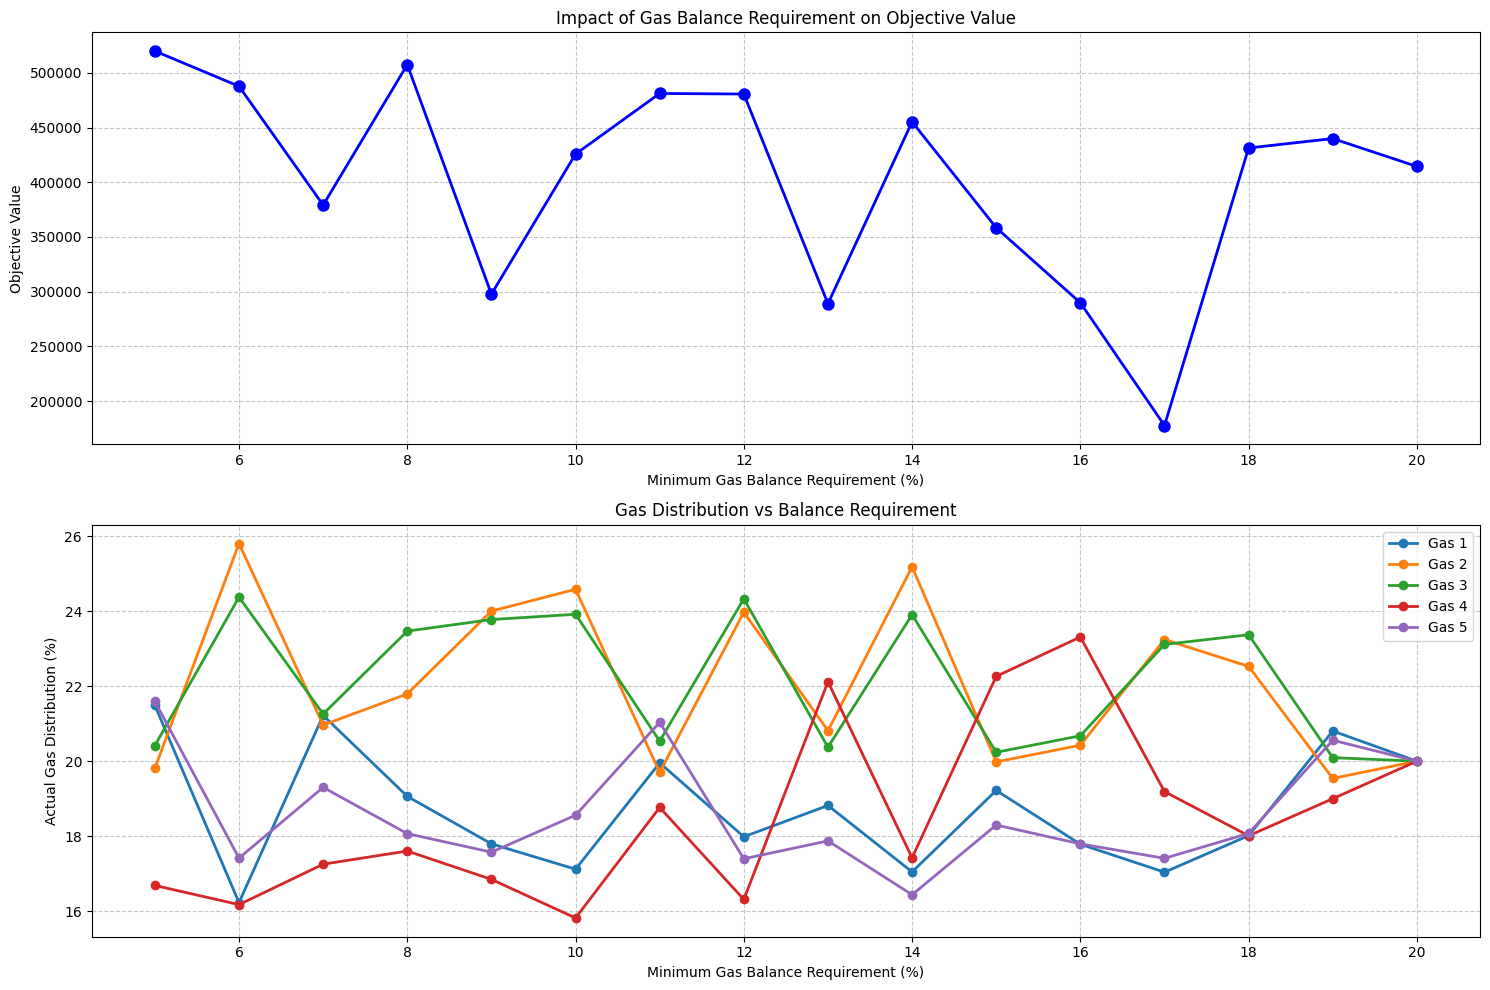


Detailed Results:
------------------------------------------------------------
 Balance       Objective     % Change
------------------------------------------------------------
   5.0%      520,048.06        0.00%
   6.0%      487,827.90       -6.20%
   7.0%      379,217.19      -27.08%
   8.0%      507,574.64       -2.40%
   9.0%      297,760.49      -42.74%
  10.0%      425,820.10      -18.12%
  11.0%      481,272.31       -7.46%
  12.0%      480,744.54       -7.56%
  13.0%      289,029.41      -44.42%
  14.0%      455,304.04      -12.45%
  15.0%      358,451.21      -31.07%
  16.0%      289,852.36      -44.26%
  17.0%      177,603.57      -65.85%
  18.0%      431,411.80      -17.04%
  19.0%      440,000.07      -15.39%
  20.0%      414,510.66      -20.29%


In [429]:
import pyomo.environ as pyo
import random
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Set random seed for reproducibility
random.seed(43)
np.random.seed(43)

def create_model_with_balance(balance_requirement):
    """Creates the Mars terraforming MILP model with specified gas balance requirement"""
    model = pyo.ConcreteModel(name="Mars Terraforming MILP")
    
    # Sets
    model.I = pyo.RangeSet(1, 100)  # 100 processes
    model.J = pyo.RangeSet(1, 5)    # 5 greenhouse gases
    model.K = pyo.RangeSet(1, 10)   # 10 resources
    model.GROUPS = pyo.Set(initialize=['CHEMICAL', 'BIOLOGICAL', 'PHYSICAL', 'ATMOSPHERIC'])
    
    # Process group assignments
    process_groups = []
    for group in ['CHEMICAL', 'BIOLOGICAL', 'PHYSICAL', 'ATMOSPHERIC']:
        process_groups.extend([group] * 25)
    random.shuffle(process_groups)
    
    model.process_group = pyo.Param(model.I, initialize=lambda m, i: process_groups[i-1])
    
    # Parameters
    def init_group_efficiency(m, i, j):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(70, 100) if j in [1, 5] else random.uniform(0, 30)
        elif group == 'BIOLOGICAL':
            return random.uniform(70, 100) if j in [2, 3] else random.uniform(0, 30)
        elif group == 'PHYSICAL':
            return random.uniform(70, 100) if j == 4 else random.uniform(0, 30)
        else:  # ATMOSPHERIC
            return random.uniform(40, 60)
    
    model.g = pyo.Param(model.I, model.J, initialize=init_group_efficiency)
    model.e = pyo.Param(model.J, initialize=lambda m, j: random.uniform(1, 100))
    
    def init_resource_usage(m, i, k):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(6, 10) if k in [1, 2] else random.uniform(0, 4)
        elif group == 'BIOLOGICAL':
            return random.uniform(6, 10) if k in [3, 4] else random.uniform(0, 4)
        elif group == 'PHYSICAL':
            return random.uniform(6, 10) if k in [5, 6] else random.uniform(0, 4)
        else:
            return random.uniform(3, 7)
    
    model.r = pyo.Param(model.I, model.K, initialize=init_resource_usage)
    model.R = pyo.Param(model.K, initialize=lambda m, k: random.uniform(200, 400))
    model.m = pyo.Param(model.I, initialize=lambda m, i: random.uniform(0.2, 0.4))
    model.M = pyo.Param(model.I, initialize=lambda m, i: random.uniform(0.8, 1))
    
    def init_startup_cost(m, i):
        group = m.process_group[i]
        if group == 'CHEMICAL':
            return random.uniform(150, 200)
        elif group == 'BIOLOGICAL':
            return random.uniform(100, 150)
        elif group == 'PHYSICAL':
            return random.uniform(120, 170)
        else:
            return random.uniform(80, 130)
    
    model.startup_cost = pyo.Param(model.I, initialize=init_startup_cost)
    
    model.max_active_per_group = pyo.Param(model.GROUPS, initialize={
        'CHEMICAL': 12,
        'BIOLOGICAL': 15,
        'PHYSICAL': 10,
        'ATMOSPHERIC': 20
    })
    
    model.min_active_per_group = pyo.Param(model.GROUPS, initialize={
        'CHEMICAL': 5,
        'BIOLOGICAL': 8,
        'PHYSICAL': 4,
        'ATMOSPHERIC': 6
    })
    
    model.startup_budget = pyo.Param(initialize=5000)
    
    # Variables
    model.x = pyo.Var(model.I, bounds=lambda m, i: (0, m.M[i]))
    model.y = pyo.Var(model.I, domain=pyo.Binary)
    
    # Objective function
    def obj_rule(model):
        return (sum(model.g[i,j] * model.e[j] * model.x[i] for i in model.I for j in model.J) -
                sum(model.startup_cost[i] * model.y[i] for i in model.I))
    model.obj = pyo.Objective(rule=obj_rule, sense=pyo.maximize)
    
    # Constraints
    model.resource_constraint = pyo.Constraint(
        model.K,
        rule=lambda m, k: sum(m.r[i,k] * m.x[i] for i in m.I) <= m.R[k]
    )
    
    # Modified gas balance constraint with variable requirement
    model.balance_constraint = pyo.Constraint(
        model.J,
        rule=lambda m, j: (sum(m.g[i,j] * m.x[i] for i in m.I) >= 
                          balance_requirement * sum(m.g[i,jj] * m.x[i] for i in m.I for jj in m.J))
    )
    
    model.logical_link = pyo.Constraint(
        model.I,
        rule=lambda m, i: m.x[i] <= m.M[i] * m.y[i]
    )
    
    model.min_operation = pyo.Constraint(
        model.I,
        rule=lambda m, i: m.x[i] >= m.m[i] * m.y[i]
    )
    
    model.budget_constraint = pyo.Constraint(
        rule=lambda m: sum(m.startup_cost[i] * m.y[i] for i in m.I) <= m.startup_budget
    )
    
    model.max_group_constraint = pyo.Constraint(
        model.GROUPS,
        rule=lambda m, g: (sum(m.y[i] for i in m.I if m.process_group[i] == g) 
                          <= m.max_active_per_group[g])
    )
    
    model.min_group_constraint = pyo.Constraint(
        model.GROUPS,
        rule=lambda m, g: (sum(m.y[i] for i in m.I if m.process_group[i] == g) 
                          >= m.min_active_per_group[g])
    )
    
    return model

# Run analysis for different balance requirements
balance_values = [0.05 + i * 0.01 for i in range(21)]  # 5% to 25%
results = []
gas_distributions = []

solver = pyo.SolverFactory('glpk')

for balance in balance_values:
    try:
        model = create_model_with_balance(balance)
        results_obj = solver.solve(model, tee=False)
        
        if (results_obj.solver.status == pyo.SolverStatus.ok and 
            results_obj.solver.termination_condition == pyo.TerminationCondition.optimal):
            
            # Get objective value
            obj_value = pyo.value(model.obj)
            
            # Calculate gas distribution
            total_gas = sum(model.g[i,j] * pyo.value(model.x[i]) 
                          for i in model.I for j in model.J)
            gas_dist = [sum(model.g[i,j] * pyo.value(model.x[i]) 
                          for i in model.I) / total_gas 
                       for j in model.J]
            
            results.append((balance, obj_value))
            gas_distributions.append((balance, gas_dist))
            print(f"Balance requirement {balance:.2%}: Objective = {obj_value:,.2f}")
        else:
            print(f"No feasible solution found for balance requirement {balance:.2%}")
    except Exception as e:
        print(f"Error for balance {balance:.2%}: {str(e)}")

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Objective Value vs Balance Requirement
plt.subplot(2, 1, 1)
balances, objectives = zip(*results)
plt.plot(
    [b * 100 for b in balances], 
    objectives, 
    'b-o', 
    linewidth=2, 
    markersize=8
)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Minimum Gas Balance Requirement (%)')
plt.ylabel('Objective Value')
plt.title('Impact of Gas Balance Requirement on Objective Value')

# Plot 2: Gas Distribution for each Balance Requirement
plt.subplot(2, 1, 2)
for gas_idx in range(5):
    plt.plot(
        [b * 100 for b, _ in gas_distributions],
        [dist[gas_idx] * 100 for _, dist in gas_distributions],
        'o-',
        label=f'Gas {gas_idx + 1}',
        linewidth=2,
        markersize=6
    )
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Minimum Gas Balance Requirement (%)')
plt.ylabel('Actual Gas Distribution (%)')
plt.title('Gas Distribution vs Balance Requirement')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("-" * 60)
print(f"{'Balance':>8} {'Objective':>15} {'% Change':>12}")
print("-" * 60)
base_obj = results[0][1]  # First objective value as base
for balance, obj in results:
    pct_change = (obj - base_obj) / base_obj * 100
    print(f"{balance:7.1%} {obj:15,.2f} {pct_change:11.2f}%")

For this part, we analyse how different values of the gas balance requirement affect the solution and the objective function values. The current model requires each gas to represent at least 10% of total gas production. We vary this parameter from 5% to 25% in steps of 1% and see how it impacts the optimal solution. 

From the output, we can see that the model finds feasible solutions for balance requirements from 5% to 20%. This indicates that requiring each gas to be more than 20% of total production is physically impossible given the process constraints and capabilities.

From the top grpah, we can observe an overall declining trend as balance requirement increases. Highest objective value (520,048) is at 5% requirement. There are significant volatility in between. We can see sharp drops at certain thresholds (e.g., 9%, 13%, 17%) and some recovery periods (e.g., 10-12%, 18-19%). The most severe impact at 17% requirement (65.85% decrease from baseline).
Now we might wonder why we see such jumps upwards and downwards between function values as we increase the gas balance requirement. These jumps can be explained by several factors:
1. Integer Nature of the Problem:
    * This is a Mixed Integer Linear Programming problem where the process activation variables (y_i) are binary (0 or 1)
    * Small changes in the balance requirement can cause discrete switches in which processes are activated or deactivated
    * These discrete changes can lead to sudden jumps in the objective value and gas distributions

2. Interaction of Constraints:
    * The model has multiple interacting constraints:
        * Gas balance requirements
        * Resource limitations
        * Budget constraints
        * Group minimum/maximum requirements
    * When the balance requirement changes, it might force the model to switch to a very different solution to satisfy all constraints simultaneously.
    * This can lead to "jumps" in the solution as the model switches between different feasible combinations

3. Process Specialization:
    * Different processes are specialized for different gases (e.g., Chemical processes for CO₂ and CF₄, Biological for CH₄ and N₂O)
    * As balance requirements change, the model might need to suddenly switch from using highly specialized processes to more balanced ones
    * This switching between process types can cause abrupt changes in both efficiency and gas distribution

4. Tipping Points:
    * Certain balance requirement values may represent tipping points where the previous solution strategy becomes infeasible
    * The model must then "jump" to a completely different solution strategy
    * For example, at 0.07, there's a notable jump because the model likely needs to activate a different mix of processes to meet the stricter balance requirement

5. Trade-off Between Objectives:
    * The objective function balances two competing goals:
        * Maximizing greenhouse gas production
        * Minimizing startup costs
    * Different balance requirements might force the model to prioritize less efficient but more balanced processes, causing drops in the objective value

From the bottom graph, we can see gas distribution patterns. At lower requirements(5-8%), we have greater spread between gases (16-26% range) and more flexibility to optimize based on process efficiencies. At middle requirements (9-15%), we can see more compressed distribution with gases 2 and 3 being consistently higher. At higher higher requirements (16-20%), we have the most compressed distribution. This gives us less ability to leverage process specializations. In the end, all gases converge toward 20% which makes sense. At 20% balance requirement, we see perfect balance (all gases at 20%) but lower objective value.

In conclusion, we can see that 5-8% requirement range provides best performance. While some gas balance requirement is necessary, making it too strict (>15%) significantly impacts system performance and eventually leads to infeasibility. A balance requirement around 10% appears to be a good compromise between maintaining gas diversity and maximizing overall system performance.